# Tutorial: Tutorial de Clasificación K-Means

### 1.1 Fundamentos de la técnica

El algoritmo **K-Means** es una técnica de *aprendizaje no supervisado* usada para **agrupar** o **segmentar datos** en *k* grupos (clusters) diferentes, basándose en la similitud entre ellos.

Su objetivo es **minimizar la distancia** entre los puntos de datos y el centro de su grupo correspondiente.

Características principales:
- No requiere etiquetas o clases previas.
- Asigna cada muestra al clúster más cercano según una medida de distancia (usualmente **Euclidiana**).
- Es ampliamente usado en minería de datos, segmentación de clientes, compresión de imágenes y reducción de dimensionalidad.

Etapas generales del algoritmo:
1. Elegir el número de clústeres \( k \).
2. Inicializar los centroides aleatoriamente.
3. Asignar cada punto al clúster con el centroide más cercano.
4. Recalcular los centroides como la media de los puntos asignados.
5. Repetir los pasos 3 y 4 hasta que las asignaciones no cambien significativamente.



#### 1.2 Modelo Matemático

Sea un conjunto de datos con *n* muestras y *m* características:

$$X = \{x_1, x_2, ..., x_n\}, \quad x_i \in \mathbb{R}^m$$

El algoritmo busca dividir los datos en *k* grupos (clusters):

$$C = \{C_1, C_2, ..., C_k\}$$

Cada grupo tiene un **centroide** (centro de masa):

$$\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$$

El objetivo es **minimizar la suma de las distancias cuadradas** entre cada punto y su centroide asignado:

$$J = \sum_{j=1}^{k} \sum_{x_i \in C_j} ||x_i - \mu_j||^2$$

El algoritmo itera entre dos pasos:

1. **Asignación:**  
   Asignar cada punto al cluster más cercano:
   
$$C_j = \{x_i : ||x_i - \mu_j||^2 \le ||x_i - \mu_l||^2, \forall l \neq j \}$$

2. **Actualización:**  
   Recalcular los centroides de cada cluster:
   
$$\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$$

Se detiene cuando los centroides ya no cambian significativamente o se alcanza un número máximo de iteraciones.


### 1.3 Descripción de la librería, clases, funciones (python) empleadas

#### pandas

Librería para manejo y análisis de datos. Permite crear estructuras como DataFrame y realizar operaciones estadísticas fácilmente.

- pd.DataFrame(): crea un DataFrame a partir de datos.

- describe(): obtiene estadísticas básicas (media, desviación estándar, máximo, mínimo…).

#### numpy

Librería para operaciones matemáticas y manejo de arreglos.

- np.array(): crea arreglos numéricos.

- np.unique(): obtiene valores únicos de un arreglo.

#### matplotlib y seaborn

Librerías de visualización de datos.

- sns.scatterplot() nos muestra que las características que son muy útiles para distinguir los clústeres.

- plt.scatter(): crea gráficos de dispersión (útiles para ver los clústeres).

- sns.pairplot(): muestra la relación entre varias variables en pares.

#### sklearn.preprocessing 

- StandardScaler: normaliza los valores

#### sklearn.datasets
- load_iris: carga el data set de iris

#### sklearn.cluster.KMeans

Clase principal que implementa el algoritmo K-Means.

- fit(X): entrena el modelo con los datos.

- predict(X): asigna un clúster a cada observación nueva.

- fit_predict(X): entrena y clasifica en un solo paso.

- cluster_centers_: devuelve los centroides de los clústeres.

- labels_: devuelve las etiquetas de clúster asignadas.

#### sklearn.metrics

Módulo que contiene métricas de evaluación.

- confusion_matrix(y_true, y_pred): genera la matriz de confusión.

- accuracy_score(y_true, y_pred): calcula el porcentaje de aciertos.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

### 1.4. Pipeline del Kmeans

A continuación, se implementan las etapas del proceso de aprendizaje no supervisado.

#### 1.4.1 Preprocesamiento

El preprocesamiento tiene como objetivo preparar los datos antes del modelado.
Incluye análisis estadístico, visualización y normalización.

Análisis estadístico: muestra información básica de los datos, como media, desviación estándar, valores mínimos y máximos.

Normalización (StandardScaler): transforma las variables para que tengan media 0 y desviación estándar 1.
Esto es importante en K-Means, ya que el algoritmo depende de distancias y podría verse afectado por escalas diferentes.

Gráfico de dispersión: permite observar cómo se distribuyen los datos antes del agrupamiento.

📊 Resumen estadístico del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


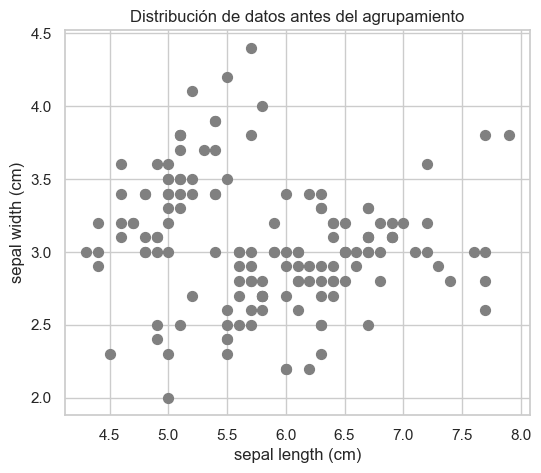

In [17]:
# Cargamos el dataset Iris como ejemplo
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target  # etiquetas reales (solo para evaluar después)

# Estadísticas básicas
print("📊 Resumen estadístico del dataset:")
display(X.describe())

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualización inicial
plt.figure(figsize=(6,5))
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, color='gray')
plt.title("Distribución de datos antes del agrupamiento")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


#### 1.4.2 Feature Engineering

En K-Means, las features (características) representan las variables que definen los objetos a agrupar.
En este caso, cada flor del conjunto Iris se describe mediante 4 características:

Largo del sépalo (sepal length)

Ancho del sépalo (sepal width)

Largo del pétalo (petal length)

Ancho del pétalo (petal width)

Primero, se crea un pairplot que muestra cómo se distribuyen y relacionan todas las variables, coloreando los puntos según la clase de la flor. Luego, se genera un scatterplot enfocado en dos variables clave el largo y ancho del pétalo para observar de forma más clara cómo estas características permiten diferenciar las especies.

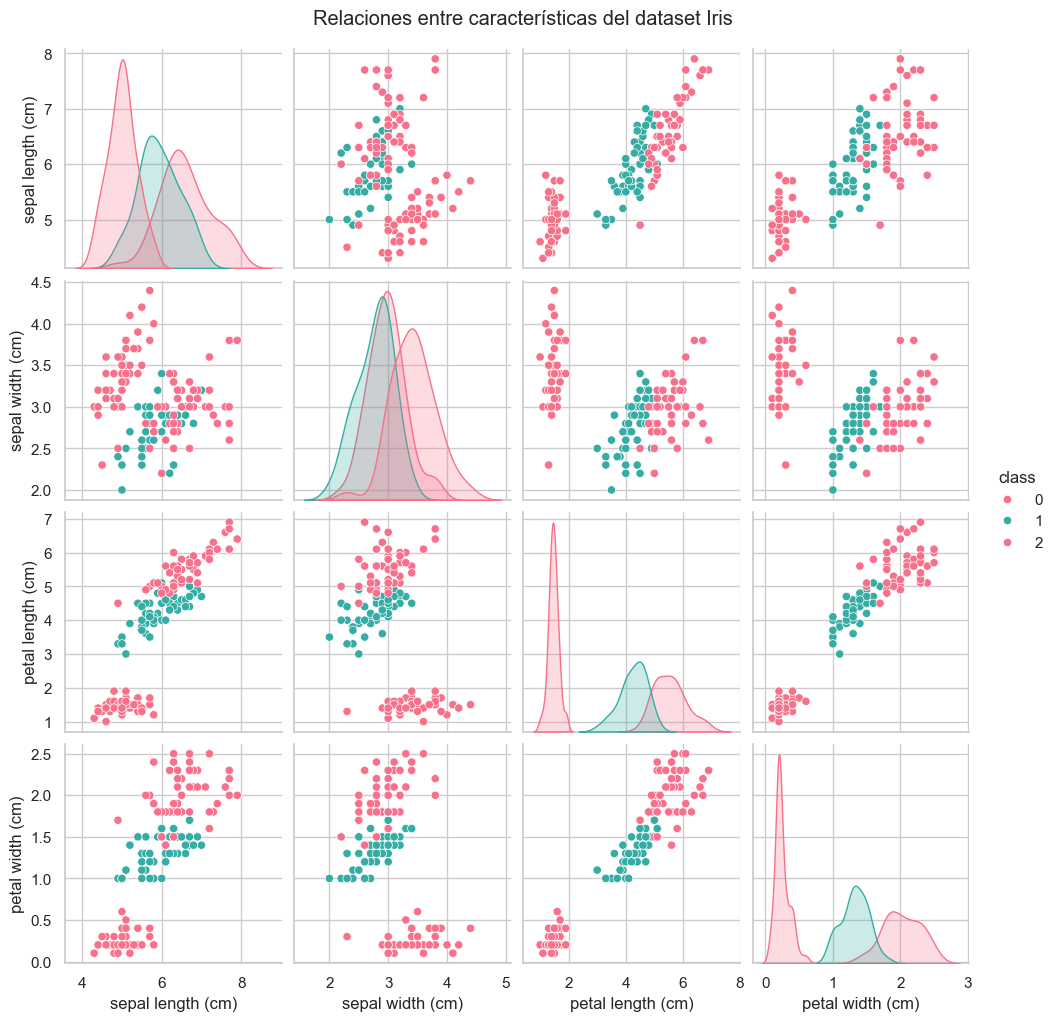

In [18]:
# Visualización con Seaborn
sns.set(style="whitegrid")

# Pairplot para observar la relación entre todas las variables
sns.pairplot(X.join(pd.Series(y_true, name="class")), hue="class", palette="husl")
plt.suptitle("Relaciones entre características del dataset Iris", y=1.02)
plt.show()



#### 1.4.3 Model Training

En esta etapa se entrena el modelo con el número de clústeres deseado.

Se define un modelo de K-Means configurado para identificar 3 clústeres (grupos) en los datos, con una semilla aleatoria (random_state=42) para asegurar reproducibilidad. Luego, el modelo se entrena usando los datos escalados (X_scaled), encontrando los centroides de cada grupo y asignando una etiqueta a cada muestra. Finalmente, se muestran los centroides calculados y las etiquetas generadas por el modelo para analizar los resultados del agrupamiento.

In [19]:
# Definición y entrenamiento del modelo
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Resultados del entrenamiento
print("Centroides encontrados:")
print(kmeans.cluster_centers_)

print("Etiquetas asignadas por el modelo:")
print(np.unique(kmeans.labels_))


Centroides encontrados:
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]
Etiquetas asignadas por el modelo:
[0 1 2]


#### 1.4.4 Prediction

Se crea la función predecir_cluster recibe un nuevo patrón con las características de una flor y lo convierte en un DataFrame con los nombres de las columnas originales del dataset Iris. Luego, normaliza los valores con el mismo escalador usado en el entrenamiento y utiliza el modelo K-Means para predecir a qué clúster pertenece. Finalmente, el ejemplo muestra cómo clasificar una nueva flor e imprimir el número del clúster asignado.

In [20]:
def predecir_cluster(nuevo_patron):
    """
    Recibe un vector con las características de una flor
    y devuelve el número de clúster asignado.
    """
    df_patron = pd.DataFrame([nuevo_patron], columns=iris.feature_names)
    nuevo_patron_scaled = scaler.transform(df_patron)
    cluster = kmeans.predict(nuevo_patron_scaled)
    return cluster[0]

# Ejemplo de uso:
nuevo = [5.1, 3.5, 1.4, 0.2]
print(f"El patrón {nuevo} pertenece al clúster:", predecir_cluster(nuevo))


El patrón [5.1, 3.5, 1.4, 0.2] pertenece al clúster: 1


#### 1.4.5 Visualización de clústeres

Se genera una visualización del resultado del modelo K-Means mostrando los datos escalados en un plano bidimensional. Cada punto se colorea según el clúster al que fue asignado, mientras que los centroides de los grupos se marcan con un símbolo rojo en forma de “X”. Esta gráfica permite observar cómo el algoritmo ha separado los datos en diferentes grupos y la posición de los centros de cada clúster.

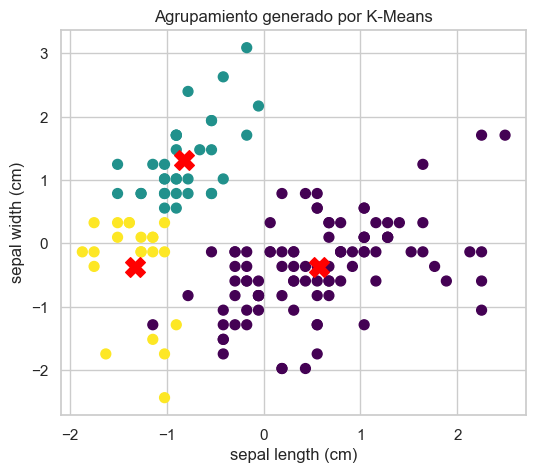

In [21]:
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X', s=200)
plt.title("Agrupamiento generado por K-Means")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


#### 1.4.6 Model Evaluation

Se evalúa el desempeño del modelo K-Means comparando las etiquetas reales del dataset (y_true) con las etiquetas asignadas por el algoritmo. Para ello, se calcula la matriz de confusión, que muestra cuántas muestras fueron correctamente o incorrectamente agrupadas, y la exactitud (accuracy), que indica el porcentaje de coincidencia entre ambas etiquetas. Estos resultados permiten analizar la calidad del agrupamiento obtenido.

In [22]:
# Matriz de confusión y accuracy
conf_matrix = confusion_matrix(y_true, kmeans.labels_)
accuracy = accuracy_score(y_true, kmeans.labels_)

print(" Matriz de Confusión:\n", conf_matrix)
print("\n Accuracy del modelo:", round(accuracy, 3))


 Matriz de Confusión:
 [[ 0 33 17]
 [46  0  4]
 [50  0  0]]

 Accuracy del modelo: 0.0


### 1.5 Referencias bibliográfica

KMEANS. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Ramírez, L. (2024, 30 octubre). Algoritmo k-means: ¿Qué es y cómo funciona? Thinking For Innovation. https://www.iebschool.com/hub/algoritmo-k-means-que-es-y-como-funciona-big-data/

GeeksforGeeks. (2025, 22 agosto). K means Clustering – Introduction. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/k-means-clustering-introduction/

Na, & Na. (2020, 15 julio). K-Means con Python paso a paso | Aprende Machine Learning. Aprende Machine Learning. https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/